In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [6]:
dataset = pd.read_csv('Housing.csv')

In [8]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
dataset.shape

(545, 13)

In [14]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean() * 100, 2), '% missing values')

In [16]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [148]:
X = dataset.drop('price', axis=1)
y = dataset['price']

In [150]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  14


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,True,False,True,False,False,False,True,False
16,9100000,6600,4,2,2,1,True,True,True,False,True,True,False,True
18,8890000,4600,3,2,2,2,True,True,False,False,True,False,False,False
19,8855000,6420,3,2,2,1,True,False,False,False,True,True,True,False
20,8750000,4320,3,1,2,2,True,False,True,True,False,False,True,False


In [152]:
# Let us work on Numeric Columns only therefore creating a Seperate DataFrame to work easily
df_numeric = dataset.select_dtypes(include='number')
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 15 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      463 non-null    int64
 1   area       463 non-null    int64
 2   bedrooms   463 non-null    int64
 3   bathrooms  463 non-null    int64
 4   stories    463 non-null    int64
 5   parking    463 non-null    int64
dtypes: int64(6)
memory usage: 25.3 KB


In [154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 15 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            463 non-null    int64
 1   area                             463 non-null    int64
 2   bedrooms                         463 non-null    int64
 3   bathrooms                        463 non-null    int64
 4   stories                          463 non-null    int64
 5   parking                          463 non-null    int64
 6   mainroad_yes                     463 non-null    bool 
 7   guestroom_yes                    463 non-null    bool 
 8   basement_yes                     463 non-null    bool 
 9   hotwaterheating_yes              463 non-null    bool 
 10  airconditioning_yes              463 non-null    bool 
 11  prefarea_yes                     463 non-null    bool 
 12  furnishingstatus_semi-furnished  463 non-null    bool 

In [156]:
df_numeric.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000
mean,4.373745e+06,4766.583153,2.857451,1.220302,1.615551,0.587473
std,1.465136e+06,1795.315000,0.658924,0.440211,0.626901,0.776003
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.342500e+06,3490.000000,2.000000,1.000000,1.000000,0.000000
50%,4.200000e+06,4300.000000,3.000000,1.000000,2.000000,0.000000
75%,5.222000e+06,6000.000000,3.000000,1.000000,2.000000,1.000000
max,9.100000e+06,10500.000000,4.000000,3.000000,3.000000,2.000000


In [158]:
df_mean=df_numeric.mean()
df_mode=df_numeric.mode()
df_median=df_numeric.median()

In [160]:
df_mean,df_mode,df_median

(price        4.373745e+06
 area         4.766583e+03
 bedrooms     2.857451e+00
 bathrooms    1.220302e+00
 stories      1.615551e+00
 parking      5.874730e-01
 dtype: float64,
      price  area  bedrooms  bathrooms  stories  parking
 0  4200000  3000         3          1        1        0,
 price        4200000.0
 area            4300.0
 bedrooms           3.0
 bathrooms          1.0
 stories            2.0
 parking            0.0
 dtype: float64)

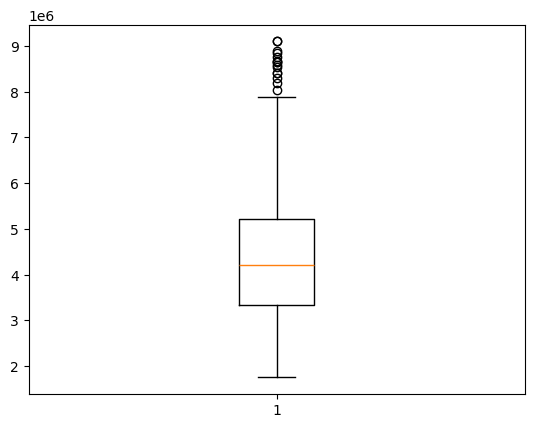

In [162]:
plt.boxplot(dataset['price'])
plt.show()

In [167]:
Q1=dataset.quantile(.25,numeric_only=True)
Q3=dataset.quantile(.75,numeric_only=True)

IQR = Q3-Q1
print(IQR)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [169]:
# Select only numeric columns for IQR calculation
numeric_cols = dataset.select_dtypes(include=['number']).columns

Q1 = dataset[numeric_cols].quantile(0.25)
Q3 = dataset[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Apply IQR rule only on numeric columns
mask = ~((dataset[numeric_cols] < (Q1 - 1.5 * IQR)) | (dataset[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
dataset = dataset[mask]

In [171]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
40,7875000,6550,3,1,2,0,True,False,True,False,True,True,False,False
55,7350000,6000,3,1,2,1,True,False,False,False,True,False,False,True
61,7070000,8880,2,1,1,1,True,False,False,False,True,False,True,False
68,6860000,6000,3,1,1,1,True,False,False,False,True,False,False,False
74,6650000,4040,3,1,2,1,True,False,True,True,False,False,False,False


In [173]:
dataset.shape

(357, 14)

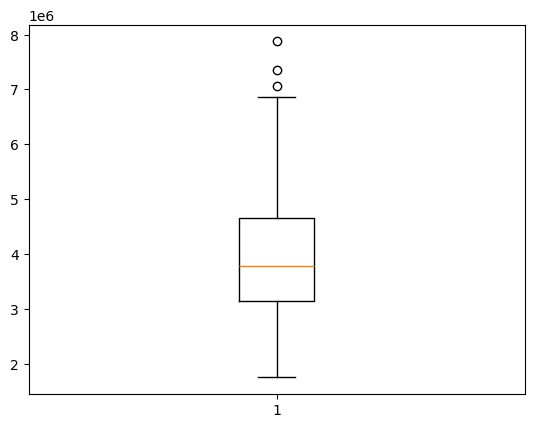

In [175]:
plt.boxplot(dataset['price'])
plt.show()

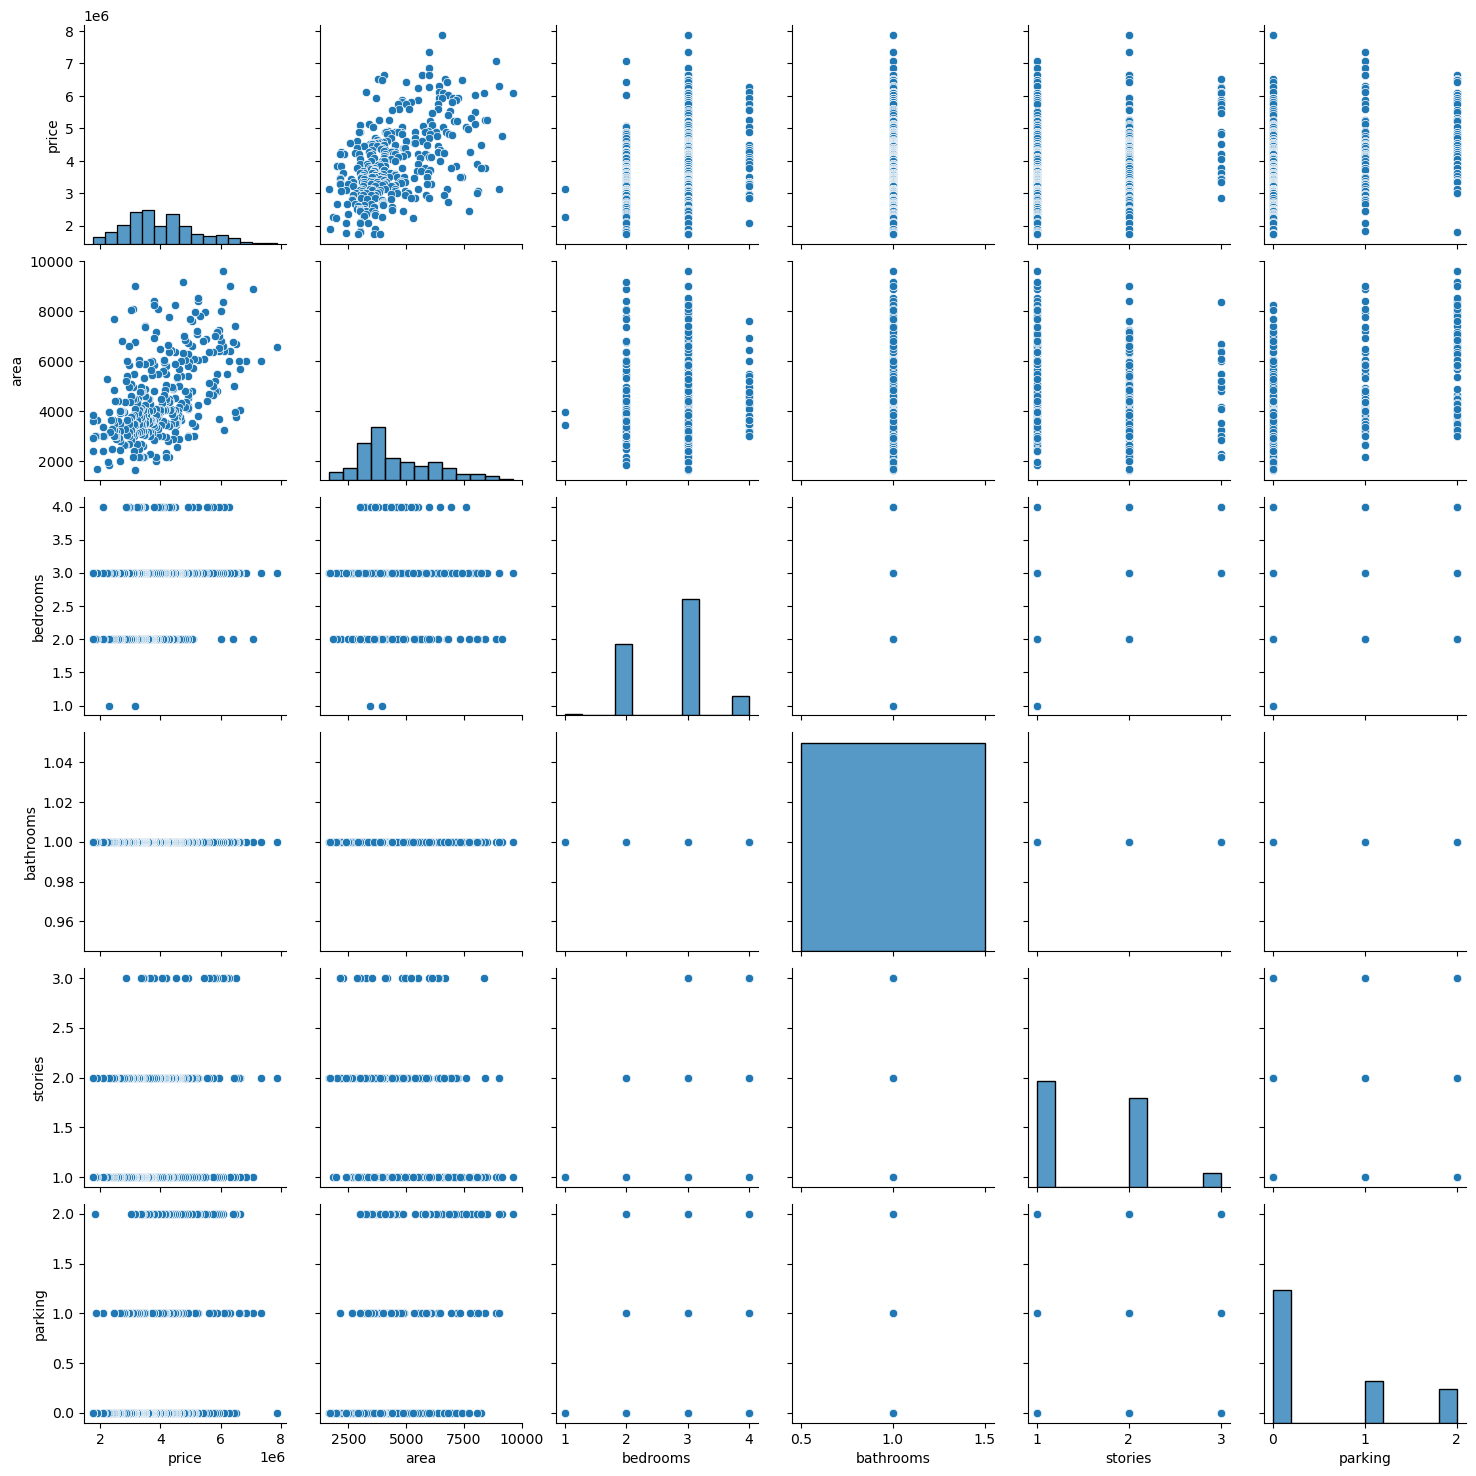

In [177]:
sns.pairplot(dataset[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.show()

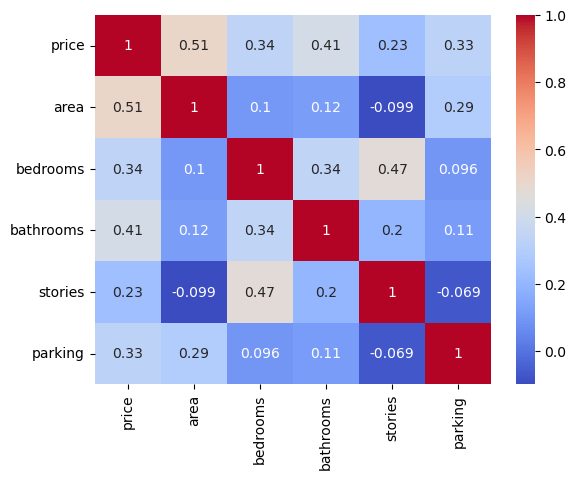

In [178]:
# Calculate correlation matrix for numeric columns
corr_matrix = df_numeric.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [179]:
# Convert categorical to numeric using get_dummies (One-Hot Encoding)
dataset = pd.get_dummies(dataset, drop_first=True)

# Check new columns after encoding
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
40,7875000,6550,3,1,2,0,True,False,True,False,True,True,False,False
55,7350000,6000,3,1,2,1,True,False,False,False,True,False,False,True
61,7070000,8880,2,1,1,1,True,False,False,False,True,False,True,False
68,6860000,6000,3,1,1,1,True,False,False,False,True,False,False,False
74,6650000,4040,3,1,2,1,True,False,True,True,False,False,False,False


In [180]:
from sklearn.model_selection import train_test_split

X = dataset.drop('price', axis=1)  # Features
y = dataset['price']  

In [181]:
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
40,6550,3,1,2,0,True,False,True,False,True,True,False,False
55,6000,3,1,2,1,True,False,False,False,True,False,False,True
61,8880,2,1,1,1,True,False,False,False,True,False,True,False
68,6000,3,1,1,1,True,False,False,False,True,False,False,False
74,4040,3,1,2,1,True,False,True,True,False,False,False,False


In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [184]:
from sklearn.linear_model import LinearRegression

In [185]:
linreg=LinearRegression()

In [186]:
linreg.fit(X_train,y_train)

LinearRegression()

In [197]:
y_pred=linreg.predict(X_test)

In [199]:
from sklearn.metrics import accuracy_score

In [201]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", round(r2, 4))
print("MAE:", round(mae, 4))
print("MSE:", round(mse, 4))
print("RMSE:", round(rmse, 4))

R² Score: 0.5308
MAE: 639877.1415
MSE: 699927275167.1656
RMSE: 836616.564


In [203]:
print(X_train.shape)
print(y_train.shape)

(267, 13)
(267,)


In [207]:
len(X_train), len(y_train)

(267, 267)

In [209]:
X_train.shape , y_train.shape

((267, 13), (267,))

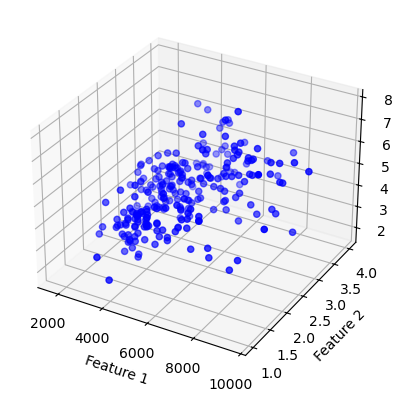

In [211]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train, color='blue')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.show()

In [146]:
dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

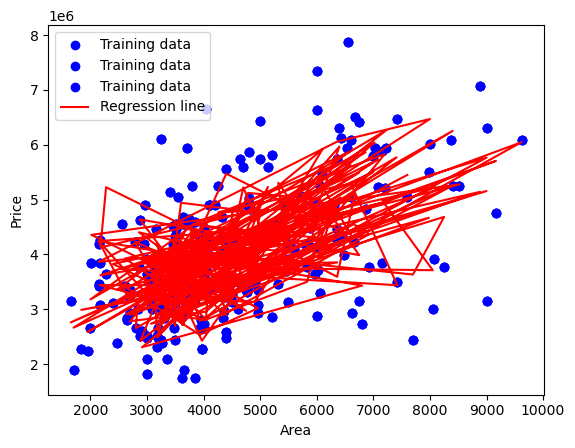

In [217]:
import matplotlib.pyplot as plt

plt.scatter(X_train['area'], y_train, color='blue', label='Training data')
plt.plot(X_train['area'], linreg.predict(X_train), color='red', label='Regression line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


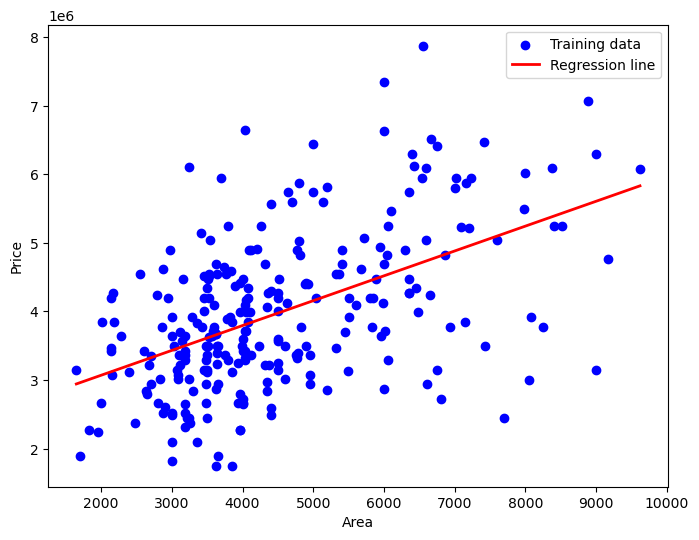

In [219]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Single feature (area)
X_area = X_train[['area']]
y_area = y_train

# Train regression model using only 'area'
reg_area = LinearRegression()
reg_area.fit(X_area, y_area)

# Sort values for smooth line
X_sorted = np.sort(X_area.values, axis=0)
y_pred_sorted = reg_area.predict(X_sorted)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_area, y_area, color='blue', label='Training data')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()